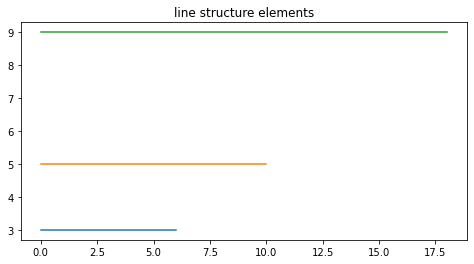

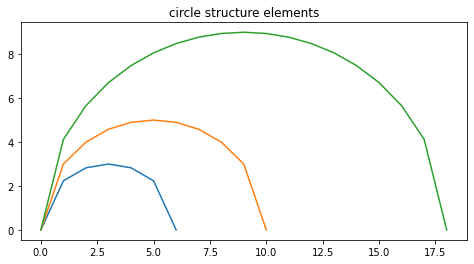

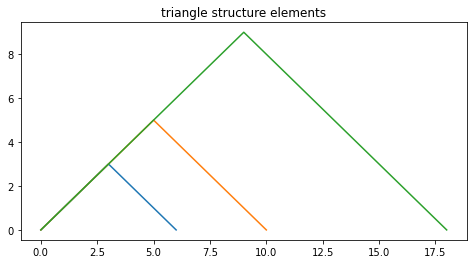

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def structure_element(radius,types):
  #type: 0-line,1-circle,2-triangle
  se = np.zeros(radius*2+1)
  if types == 0:
    se = se + radius
  if types == 1:
    for i in range(radius*2+1):
      se[i]= np.sqrt(radius*radius-(radius-i)*(radius-i))
  if types == 2:
    for i in range(radius+1):
      se[i] = i;
      se[radius*2-i] = i;
  return se

se1 = structure_element(3,0)
se2 = structure_element(5,0)
se3 = structure_element(9,0)
plt.figure(figsize=(8,4))
plt.title("line structure elements")
plt.plot(se1)
plt.plot(se2)
plt.plot(se3)
plt.show()

se1 = structure_element(3,1)
se2 = structure_element(5,1)
se3 = structure_element(9,1)
plt.figure(figsize=(8,4))
plt.title("circle structure elements")
plt.plot(se1)
plt.plot(se2)
plt.plot(se3)
plt.show()

se1 = structure_element(3,2)
se2 = structure_element(5,2)
se3 = structure_element(9,2)
plt.figure(figsize=(8,4))
plt.title("triangle structure elements")
plt.plot(se1)
plt.plot(se2)
plt.plot(se3)
plt.show()

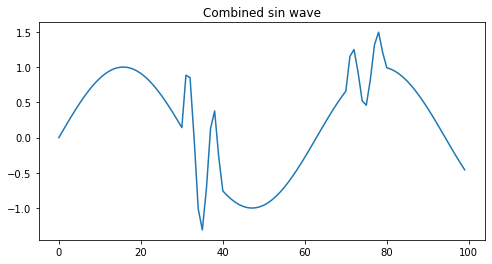

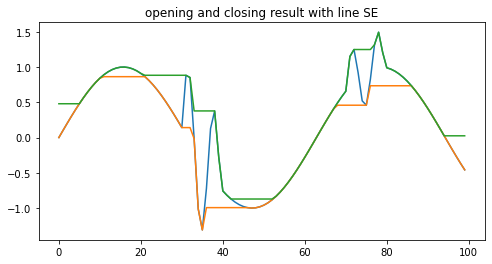

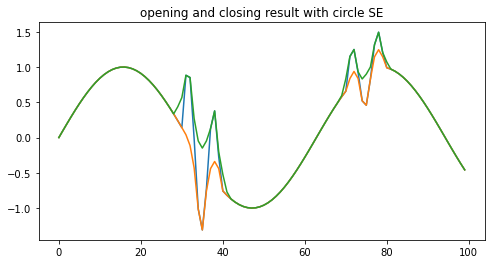

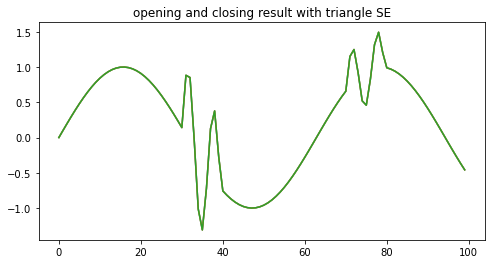

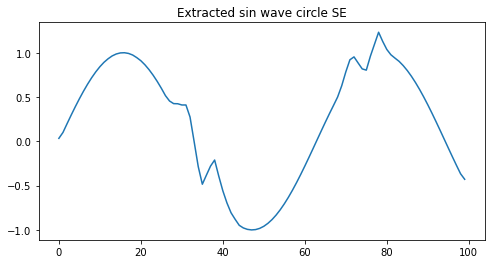

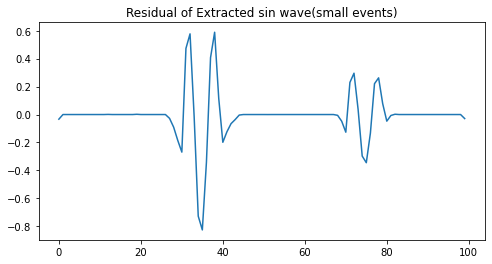

In [2]:
time        = np.arange(0, 10, 0.1);
data   = np.sin(time)
data_add = np.sin(np.arange(0,10))
data[30:40] = data[30:40] + data_add
data[70:80] = data[70:80] + data_add*0.5
r = 5
plt.figure(figsize=(8,4))
plt.title("Combined sin wave")
plt.plot(data)
plt.show()

def erosion(data,se):
  r = (len(se)-1)/2
  l = len(se)
  data = np.insert(data,0,data[0].repeat(r),0)
  data = np.append(data,data[-1].repeat(r))
  result = np.zeros(len(data)-len(se)+1)
  for i in range(len(data)-len(se)+1):
    result[i] = min(data[i:i+len(se)]-se)
  return result

def dilation(data,se):
  r = (len(se)-1)/2
  l = len(se)
  data = np.insert(data,0,data[0].repeat(r),0)
  data = np.append(data,data[-1].repeat(r))
  result = np.zeros(len(data)-len(se)+1)
  for i in range(len(data)-len(se)+1):
    result[i] = max(data[i:i+len(se)]+se)
  return result

def opening(data,se):
  data = erosion(data,se)
  data = dilation(data,se)
  return data

def closing(data,se):
  data = dilation(data,se)
  data = erosion(data,se)
  return data

se = structure_element(5,0)
data1 = opening(data,se)
data2 = closing(data,se)

plt.figure(figsize=(8,4))
plt.title("opening and closing result with line SE")
plt.plot(data)
plt.plot(data1)
plt.plot(data2)
plt.show()

se = structure_element(5,1)
data1 = opening(data,se)
data2 = closing(data,se)

plt.figure(figsize=(8,4))
plt.title("opening and closing result with circle SE")
plt.plot(data)
plt.plot(data1)
plt.plot(data2)
plt.show()

se = structure_element(5,2)
data1 = opening(data,se)
data2 = closing(data,se)

plt.figure(figsize=(8,4))
plt.title("opening and closing result with triangle SE")
plt.plot(data)
plt.plot(data1)
plt.plot(data2)
plt.show()

se = structure_element(15,1)
data1 = opening(data,se)
data2 = closing(data,se)
sin_extract = (data1+data2)/2
residual = data - sin_extract

plt.figure(figsize=(8,4))
plt.title("Extracted sin wave circle SE")
plt.plot(sin_extract)
plt.show()

plt.figure(figsize=(8,4))
plt.title("Residual of Extracted sin wave(small events)")
plt.plot(residual)
plt.show()

[17715. 20650. 19074. ... 13261. 13979. 18099.]


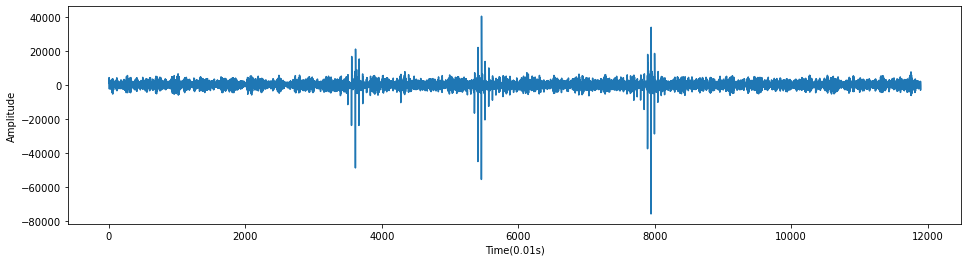

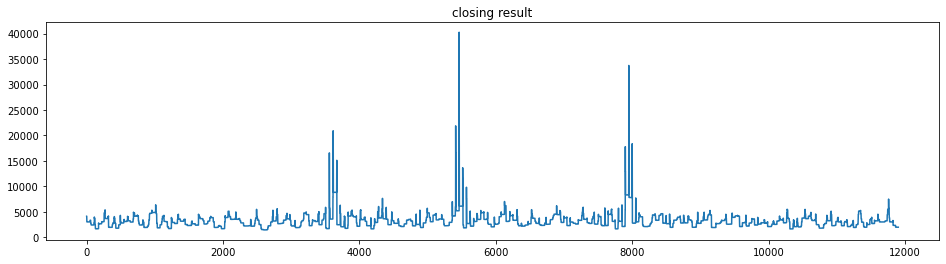

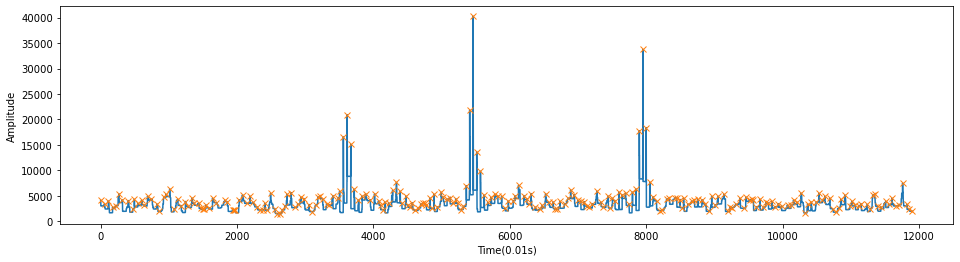

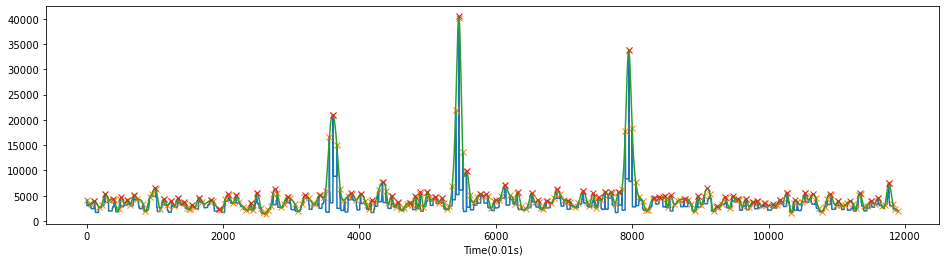

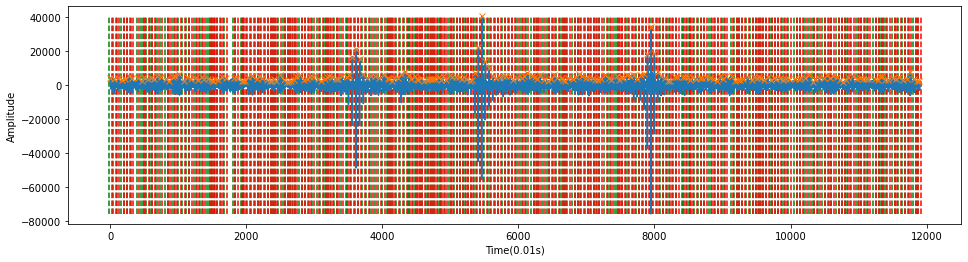

In [3]:
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
import pywt
from influxdb import InfluxDBClient
import operator
import scipy.signal as sg
import scipy as sp

from numpy.fft import rfft, irfft, rfftfreq
from scipy import fftpack
import pandas as pd

'''
ip = "sensorweb.us" 
unit = "b8:27:eb:48:68:fa" # FloorB
stampIni = "2020-08-22T00:42:41.000Z" # UTC time = EST time + 4
stampEnd = "2020-08-22T00:43:00.000Z"
client = InfluxDBClient(ip, "8086", "sili", "sensorweb", "floorseis",   True)
# Check FloorB at http://3.136.84.223:3000/d/3HdIpxGMz/s-house-dashboard-raw-data-only?orgId=1&from=1594149493945&to=1594149503005

query = 'SELECT "value" FROM Z WHERE ("location" = \''+unit+'\')  and time >= \''+stampIni+'\' and time <= \''+stampEnd+'\'   '
result = client.query(query)
points = list(result.get_points())
values =  map(operator.itemgetter('value'), points)
times  =  map(operator.itemgetter('time'),  points)
data = np.array(list(values))
if(len(data) == 0):
  print("No data in the chosen time range!")
  quit()
'''

with open('silidemo4e82.csv', newline='') as csvfile:
#with open('silistep910.csv', newline='') as csvfile:
     spamreader = csv.reader(csvfile, delimiter=';')
     seis = []
     for row in spamreader:
         seis.append(row[2])
     seis.pop(0)
     seis = np.array(seis)
     seis = seis.astype(np.float)
     print(seis)

        
data = seis-seis.mean()

plt.figure(figsize=(16,4))
#plt.title("Event samples")
plt.ylabel('Amplitude')
plt.xlabel('Time(0.01s)')
plt.plot(data)
plt.show()





se = structure_element(20,1)
data1 = opening(data,se)
data2 = closing(data,se)
sin_extract = (data1+data2)/2
residual = data - sin_extract

dataclose = data
for i in range(5,10):
    multise = structure_element(i,1)
    dataclose = closing(dataclose,multise)

plt.figure(figsize=(16,4))
plt.title("closing result")
plt.plot(data2)
plt.show()


####### peak detection
x = data2
peaks1, _ = sp.signal.find_peaks(x, height=0)

plt.figure(figsize=(16, 4))
plt.xlabel('Time(0.01s)')
plt.ylabel('Amplitude')
#plt.title("Finding peaks with closing curve, and finding peaks over the curve of peaks ")
plt.plot(x)
plt.plot(peaks1, x[peaks1], "x")
#plt.plot(np.zeros_like(x), "--", color="gray")
plt.show()

values = np.zeros((1,len(peaks1)))
cValues = 0;
for val in peaks1:
      values[0,cValues] = x[val]
      cValues = cValues + 1
values = values.ravel()

xvals = np.linspace(0, len(data), len(data))
x2 = sp.interpolate.interp1d(peaks1,values, kind='cubic',bounds_error=False)(xvals)
peaks2, _ = sg.find_peaks(x2, height=0)

plt.figure(figsize=(16, 4))
plt.xlabel('Time(0.01s)')
#plt.ylabel('Curve of peaks')
#plt.title("Finding peaks over the curve of peaks")
plt.plot(x)
plt.plot(peaks1, x[peaks1], "x")
plt.plot(x2)
plt.plot(peaks2, x2[peaks2], "x")
#plt.plot(np.zeros_like(x), "--", color="gray")
plt.show()

y_min=min(data)
y_max=max(data)
plt.figure(figsize=(16, 4))
plt.ylabel('Amplitude')
plt.xlabel('Time(0.01s)')
#plt.title("Automatic segmentation with mathematical morphology")
#plt.plot(x2)
plt.plot(data)
plt.plot(peaks1, x[peaks1], "x")
plt.vlines(peaks1-20, y_min, y_max, 'g', '--', label='example')
plt.vlines(peaks1+20, y_min, y_max, 'r', '--', label='example')
#plt.plot(np.zeros_like(x), "--", color="gray")
plt.show()
node4e82= x2

[12855.  7955.  8838. ... 17597. 13277. 14079.]


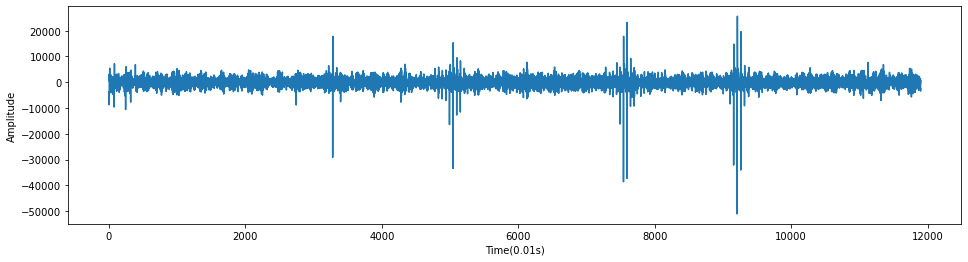

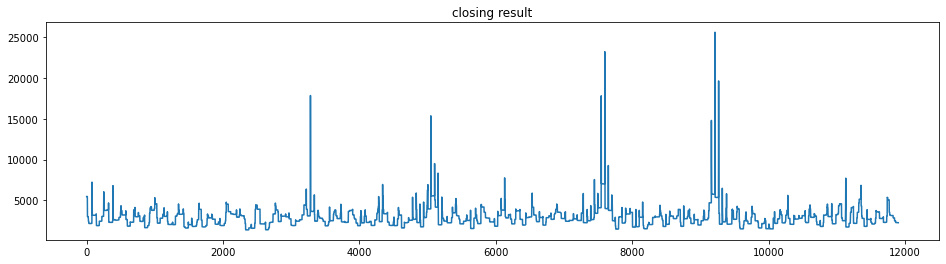

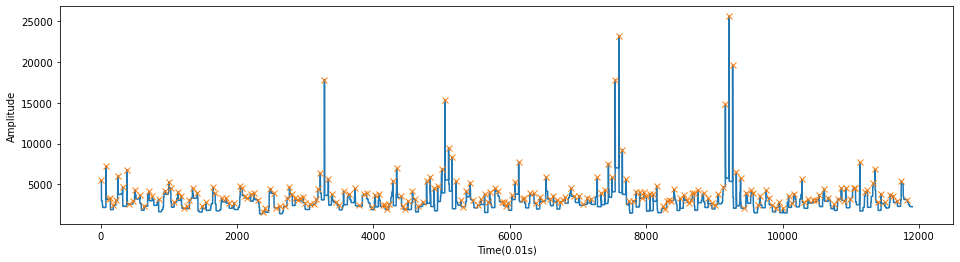

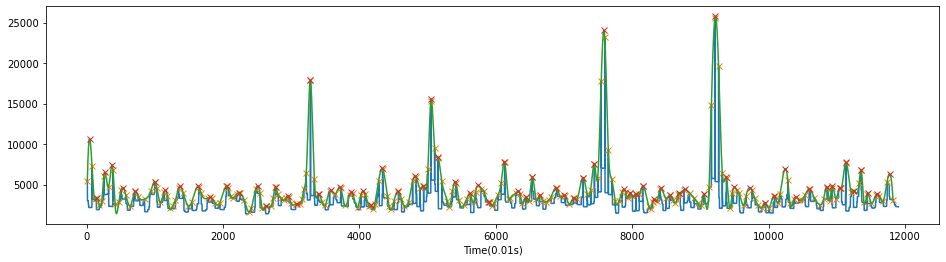

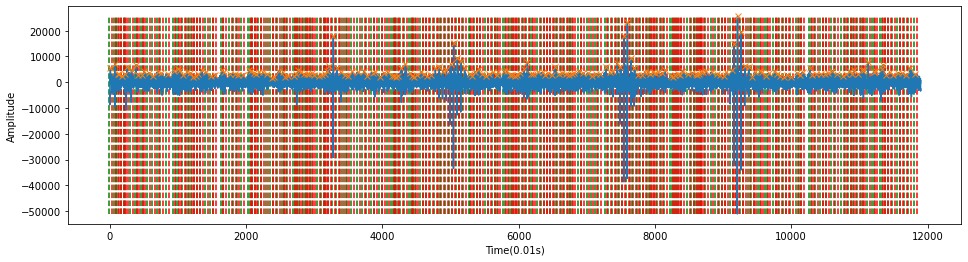

In [4]:
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
import pywt
from influxdb import InfluxDBClient
import operator
import scipy.signal as sg
import scipy as sp

from numpy.fft import rfft, irfft, rfftfreq
from scipy import fftpack
import pandas as pd

'''
ip = "sensorweb.us" 
unit = "b8:27:eb:48:68:fa" # FloorB
stampIni = "2020-08-22T00:42:41.000Z" # UTC time = EST time + 4
stampEnd = "2020-08-22T00:43:00.000Z"
client = InfluxDBClient(ip, "8086", "sili", "sensorweb", "floorseis",   True)
# Check FloorB at http://3.136.84.223:3000/d/3HdIpxGMz/s-house-dashboard-raw-data-only?orgId=1&from=1594149493945&to=1594149503005

query = 'SELECT "value" FROM Z WHERE ("location" = \''+unit+'\')  and time >= \''+stampIni+'\' and time <= \''+stampEnd+'\'   '
result = client.query(query)
points = list(result.get_points())
values =  map(operator.itemgetter('value'), points)
times  =  map(operator.itemgetter('time'),  points)
data = np.array(list(values))
if(len(data) == 0):
  print("No data in the chosen time range!")
  quit()
'''

with open('silidemo4868.csv', newline='') as csvfile:
#with open('silistep910.csv', newline='') as csvfile:
     spamreader = csv.reader(csvfile, delimiter=';')
     seis = []
     for row in spamreader:
         seis.append(row[2])
     seis.pop(0)
     seis = np.array(seis)
     seis = seis.astype(np.float)
     print(seis)

        
data = seis-seis.mean()

plt.figure(figsize=(16,4))
#plt.title("Event samples")
plt.ylabel('Amplitude')
plt.xlabel('Time(0.01s)')
plt.plot(data)
plt.show()





se = structure_element(20,1)
data1 = opening(data,se)
data2 = closing(data,se)
sin_extract = (data1+data2)/2
residual = data - sin_extract

dataclose = data
for i in range(5,10):
    multise = structure_element(i,1)
    dataclose = closing(dataclose,multise)

plt.figure(figsize=(16,4))
plt.title("closing result")
plt.plot(data2)
plt.show()


####### peak detection
x = data2
peaks1, _ = sp.signal.find_peaks(x, height=0)

plt.figure(figsize=(16, 4))
plt.xlabel('Time(0.01s)')
plt.ylabel('Amplitude')
#plt.title("Finding peaks with closing curve, and finding peaks over the curve of peaks ")
plt.plot(x)
plt.plot(peaks1, x[peaks1], "x")
#plt.plot(np.zeros_like(x), "--", color="gray")
plt.show()

values = np.zeros((1,len(peaks1)))
cValues = 0;
for val in peaks1:
      values[0,cValues] = x[val]
      cValues = cValues + 1
values = values.ravel()

xvals = np.linspace(0, len(data), len(data))
x2 = sp.interpolate.interp1d(peaks1,values, kind='cubic',bounds_error=False)(xvals)
peaks2, _ = sg.find_peaks(x2, height=0)

plt.figure(figsize=(16, 4))
plt.xlabel('Time(0.01s)')
#plt.ylabel('Curve of peaks')
#plt.title("Finding peaks over the curve of peaks")
plt.plot(x)
plt.plot(peaks1, x[peaks1], "x")
plt.plot(x2)
plt.plot(peaks2, x2[peaks2], "x")
#plt.plot(np.zeros_like(x), "--", color="gray")
plt.show()

y_min=min(data)
y_max=max(data)
plt.figure(figsize=(16, 4))
plt.ylabel('Amplitude')
plt.xlabel('Time(0.01s)')
#plt.title("Automatic segmentation with mathematical morphology")
#plt.plot(x2)
plt.plot(data)
plt.plot(peaks1, x[peaks1], "x")
plt.vlines(peaks1-20, y_min, y_max, 'g', '--', label='example')
plt.vlines(peaks1+20, y_min, y_max, 'r', '--', label='example')
#plt.plot(np.zeros_like(x), "--", color="gray")
plt.show()
node4868= x2

[13332. 16103. 17070. ... 13334. 16947. 17455.]


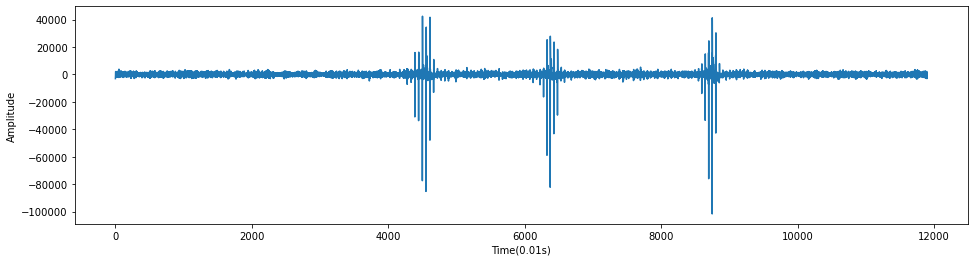

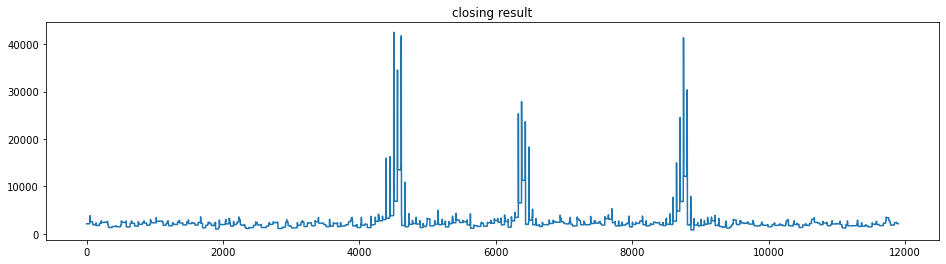

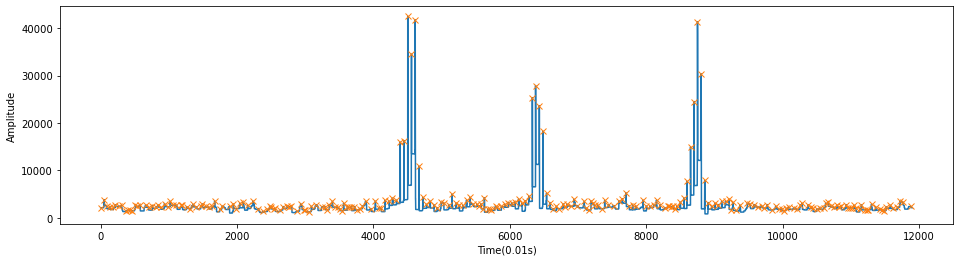

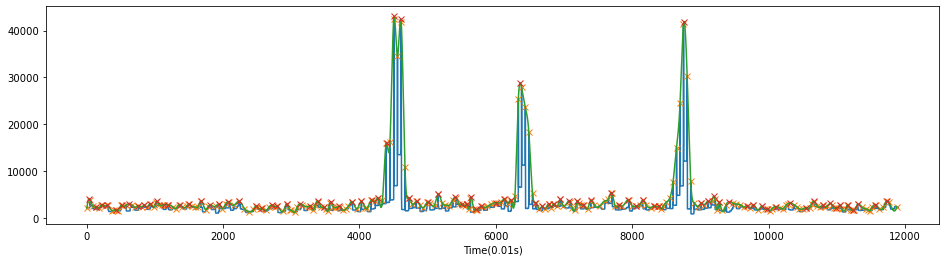

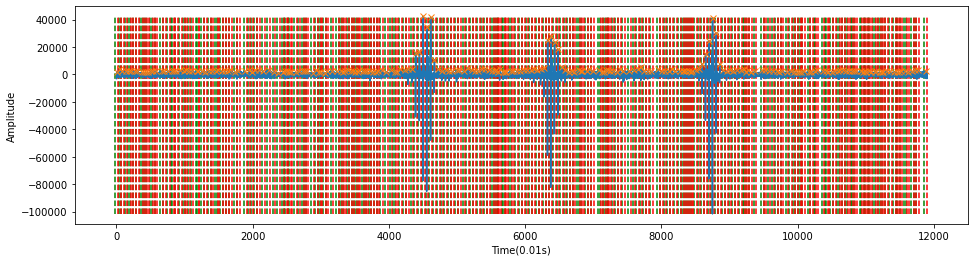

In [5]:
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
import pywt
from influxdb import InfluxDBClient
import operator
import scipy.signal as sg
import scipy as sp

from numpy.fft import rfft, irfft, rfftfreq
from scipy import fftpack
import pandas as pd

'''
ip = "sensorweb.us" 
unit = "b8:27:eb:48:68:fa" # FloorB
stampIni = "2020-08-22T00:42:41.000Z" # UTC time = EST time + 4
stampEnd = "2020-08-22T00:43:00.000Z"
client = InfluxDBClient(ip, "8086", "sili", "sensorweb", "floorseis",   True)
# Check FloorB at http://3.136.84.223:3000/d/3HdIpxGMz/s-house-dashboard-raw-data-only?orgId=1&from=1594149493945&to=1594149503005

query = 'SELECT "value" FROM Z WHERE ("location" = \''+unit+'\')  and time >= \''+stampIni+'\' and time <= \''+stampEnd+'\'   '
result = client.query(query)
points = list(result.get_points())
values =  map(operator.itemgetter('value'), points)
times  =  map(operator.itemgetter('time'),  points)
data = np.array(list(values))
if(len(data) == 0):
  print("No data in the chosen time range!")
  quit()
'''

with open('silidemo8582.csv', newline='') as csvfile:
#with open('silistep910.csv', newline='') as csvfile:
     spamreader = csv.reader(csvfile, delimiter=';')
     seis = []
     for row in spamreader:
         seis.append(row[2])
     seis.pop(0)
     seis = np.array(seis)
     seis = seis.astype(np.float)
     print(seis)

        
data = seis-seis.mean()

plt.figure(figsize=(16,4))
#plt.title("Event samples")
plt.ylabel('Amplitude')
plt.xlabel('Time(0.01s)')
plt.plot(data)
plt.show()





se = structure_element(20,1)
data1 = opening(data,se)
data2 = closing(data,se)
sin_extract = (data1+data2)/2
residual = data - sin_extract

dataclose = data
for i in range(5,10):
    multise = structure_element(i,1)
    dataclose = closing(dataclose,multise)

plt.figure(figsize=(16,4))
plt.title("closing result")
plt.plot(data2)
plt.show()


####### peak detection
x = data2
peaks1, _ = sp.signal.find_peaks(x, height=0)

plt.figure(figsize=(16, 4))
plt.xlabel('Time(0.01s)')
plt.ylabel('Amplitude')
#plt.title("Finding peaks with closing curve, and finding peaks over the curve of peaks ")
plt.plot(x)
plt.plot(peaks1, x[peaks1], "x")
#plt.plot(np.zeros_like(x), "--", color="gray")
plt.show()

values = np.zeros((1,len(peaks1)))
cValues = 0;
for val in peaks1:
      values[0,cValues] = x[val]
      cValues = cValues + 1
values = values.ravel()

xvals = np.linspace(0, len(data), len(data))
x2 = sp.interpolate.interp1d(peaks1,values, kind='cubic',bounds_error=False)(xvals)
peaks2, _ = sg.find_peaks(x2, height=0)

plt.figure(figsize=(16, 4))
plt.xlabel('Time(0.01s)')
#plt.ylabel('Curve of peaks')
#plt.title("Finding peaks over the curve of peaks")
plt.plot(x)
plt.plot(peaks1, x[peaks1], "x")
plt.plot(x2)
plt.plot(peaks2, x2[peaks2], "x")
#plt.plot(np.zeros_like(x), "--", color="gray")
plt.show()

y_min=min(data)
y_max=max(data)
plt.figure(figsize=(16, 4))
plt.ylabel('Amplitude')
plt.xlabel('Time(0.01s)')
#plt.title("Automatic segmentation with mathematical morphology")
#plt.plot(x2)
plt.plot(data)
plt.plot(peaks1, x[peaks1], "x")
plt.vlines(peaks1-20, y_min, y_max, 'g', '--', label='example')
plt.vlines(peaks1+20, y_min, y_max, 'r', '--', label='example')
#plt.plot(np.zeros_like(x), "--", color="gray")
plt.show()
node8582= x2

[ 7236.  8355. 10047. ... 10627.  9984.  8145.]


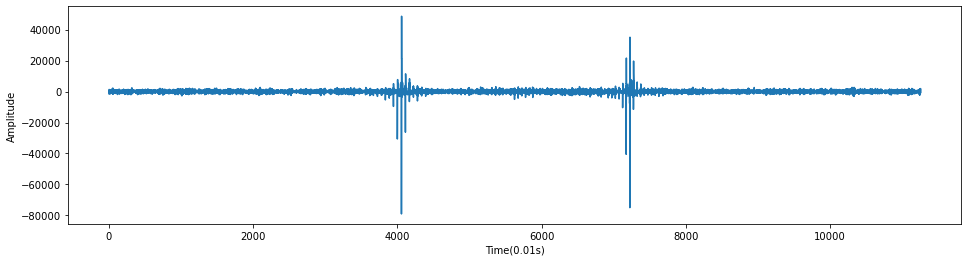

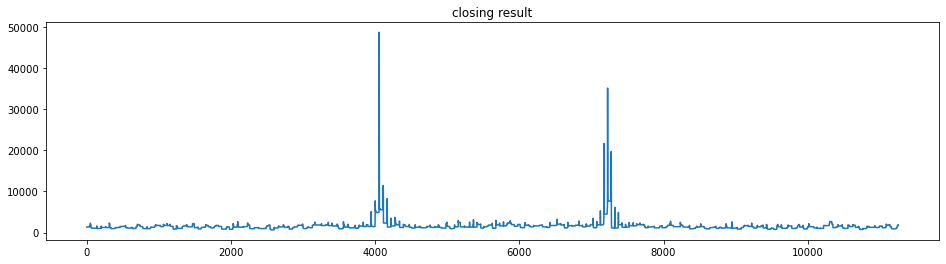

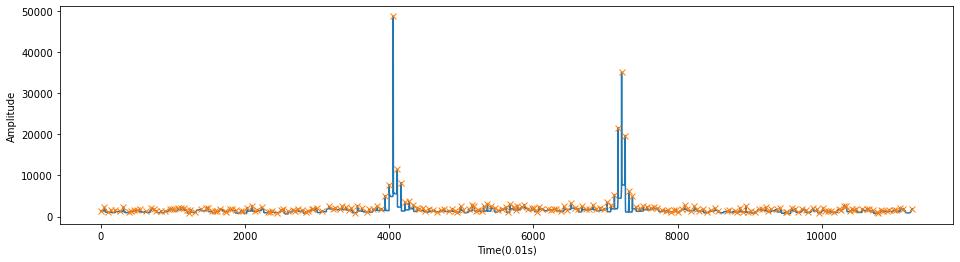

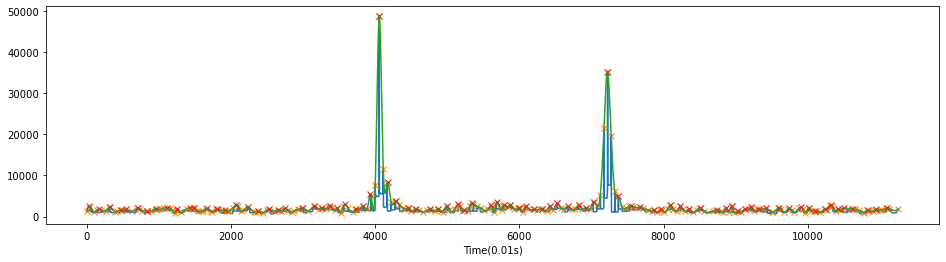

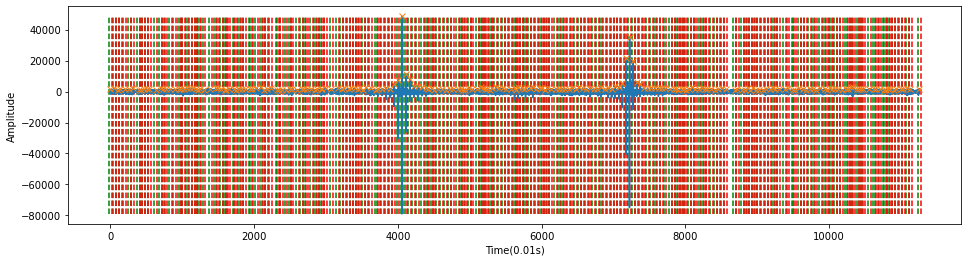

In [6]:
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
import pywt
from influxdb import InfluxDBClient
import operator
import scipy.signal as sg
import scipy as sp

from numpy.fft import rfft, irfft, rfftfreq
from scipy import fftpack
import pandas as pd

'''
ip = "sensorweb.us" 
unit = "b8:27:eb:48:68:fa" # FloorB
stampIni = "2020-08-22T00:42:41.000Z" # UTC time = EST time + 4
stampEnd = "2020-08-22T00:43:00.000Z"
client = InfluxDBClient(ip, "8086", "sili", "sensorweb", "floorseis",   True)
# Check FloorB at http://3.136.84.223:3000/d/3HdIpxGMz/s-house-dashboard-raw-data-only?orgId=1&from=1594149493945&to=1594149503005

query = 'SELECT "value" FROM Z WHERE ("location" = \''+unit+'\')  and time >= \''+stampIni+'\' and time <= \''+stampEnd+'\'   '
result = client.query(query)
points = list(result.get_points())
values =  map(operator.itemgetter('value'), points)
times  =  map(operator.itemgetter('time'),  points)
data = np.array(list(values))
if(len(data) == 0):
  print("No data in the chosen time range!")
  quit()
'''

with open('silidemoae69.csv', newline='') as csvfile:
#with open('silistep910.csv', newline='') as csvfile:
     spamreader = csv.reader(csvfile, delimiter=';')
     seis = []
     for row in spamreader:
         seis.append(row[2])
     seis.pop(0)
     seis = np.array(seis)
     seis = seis.astype(np.float)
     print(seis)

        
data = seis-seis.mean()

plt.figure(figsize=(16,4))
#plt.title("Event samples")
plt.ylabel('Amplitude')
plt.xlabel('Time(0.01s)')
plt.plot(data)
plt.show()





se = structure_element(20,1)
data1 = opening(data,se)
data2 = closing(data,se)
sin_extract = (data1+data2)/2
residual = data - sin_extract

dataclose = data
for i in range(5,10):
    multise = structure_element(i,1)
    dataclose = closing(dataclose,multise)

plt.figure(figsize=(16,4))
plt.title("closing result")
plt.plot(data2)
plt.show()


####### peak detection
x = data2
peaks1, _ = sp.signal.find_peaks(x, height=0)

plt.figure(figsize=(16, 4))
plt.xlabel('Time(0.01s)')
plt.ylabel('Amplitude')
#plt.title("Finding peaks with closing curve, and finding peaks over the curve of peaks ")
plt.plot(x)
plt.plot(peaks1, x[peaks1], "x")
#plt.plot(np.zeros_like(x), "--", color="gray")
plt.show()

values = np.zeros((1,len(peaks1)))
cValues = 0;
for val in peaks1:
      values[0,cValues] = x[val]
      cValues = cValues + 1
values = values.ravel()

xvals = np.linspace(0, len(data), len(data))
x2 = sp.interpolate.interp1d(peaks1,values, kind='cubic',bounds_error=False)(xvals)
peaks2, _ = sg.find_peaks(x2, height=0)

plt.figure(figsize=(16, 4))
plt.xlabel('Time(0.01s)')
#plt.ylabel('Curve of peaks')
#plt.title("Finding peaks over the curve of peaks")
plt.plot(x)
plt.plot(peaks1, x[peaks1], "x")
plt.plot(x2)
plt.plot(peaks2, x2[peaks2], "x")
#plt.plot(np.zeros_like(x), "--", color="gray")
plt.show()

y_min=min(data)
y_max=max(data)
plt.figure(figsize=(16, 4))
plt.ylabel('Amplitude')
plt.xlabel('Time(0.01s)')
#plt.title("Automatic segmentation with mathematical morphology")
#plt.plot(x2)
plt.plot(data)
plt.plot(peaks1, x[peaks1], "x")
plt.vlines(peaks1-20, y_min, y_max, 'g', '--', label='example')
plt.vlines(peaks1+20, y_min, y_max, 'r', '--', label='example')
#plt.plot(np.zeros_like(x), "--", color="gray")
plt.show()
nodeae69= x2

<IPython.core.display.Javascript object>


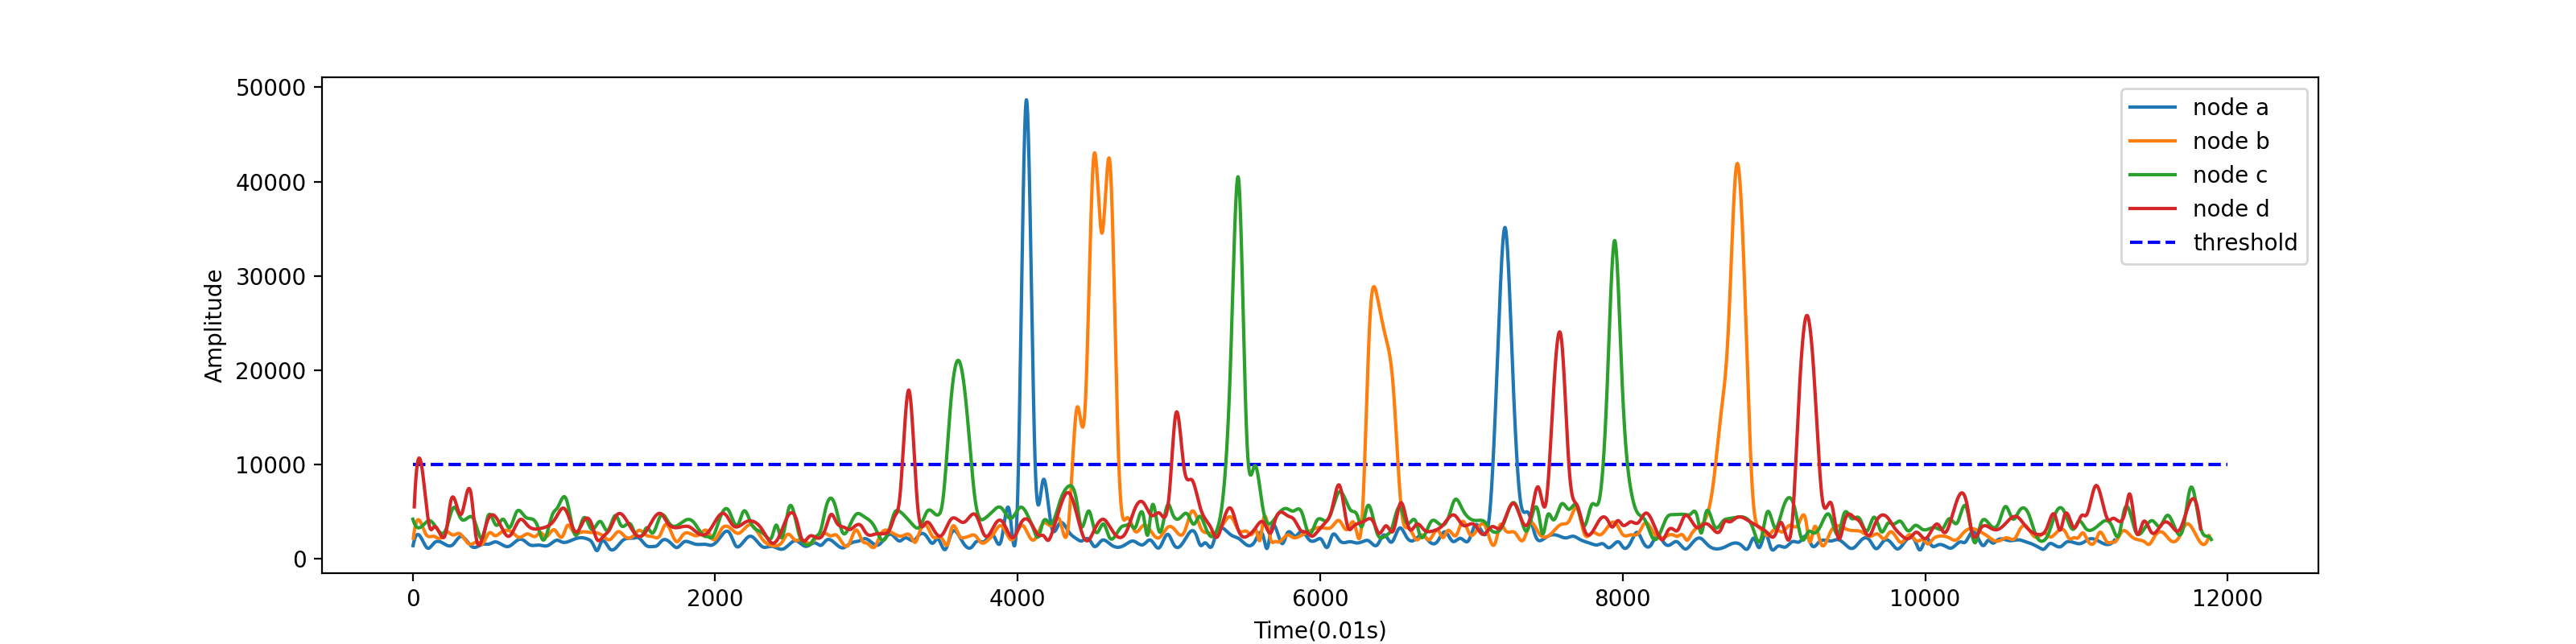

[   33   166   320   473   545   712   830   955  1113  1258  1436  1484
  1666  1807  1924  2077  2232  2370  2529  2657  2750  2991  3158  3260
  3369  3470  3580  3739  3827  3936  4058  4172  4287  4460  4567  4760
  4873  4992  5155  5239  5343  5607  5691  5794  5876  5997  6091  6197
  6308  6423  6528  6671  6824  6926  7032  7222  7366  7542  7670  7863
  7968  8095  8233  8353  8506  8746  8866  8945  9034  9129  9211  9329
  9420  9607  9743  9905 10011 10098 10236 10317 10420 10503 10616 10830
 10952 11100]


In [28]:
plt.figure(figsize=(16, 4))
plt.ylabel('Amplitude')
plt.xlabel('Time(0.01s)')
#plt.title("Automatic segmentation with mathematical morphology")
#plt.plot(x2)
plt.plot(nodeae69,label='node a')
plt.plot(node8582,label='node b')
plt.plot(node4e82,label='node c')
plt.plot(node4868,label='node d')
plt.hlines(10000, 0, 12000, 'b', '--', label='threshold')
plt.legend()
#plt.plot(np.zeros_like(x), "--", color="gray")
plt.show()




In [47]:
traj = np.zeros(12001)
peaksa, _ = sg.find_peaks(nodeae69, height=0)
for i in peaksa:
    if nodeae69[i]>10000:
        traj[i]=1
peaksb, _ = sg.find_peaks(node8582, height=0)
for i in peaksb:
    if node8582[i]>10000:
        traj[i]=2
peaksc, _ = sg.find_peaks(node4e82, height=0)
for i in peaksc:
    if node4e82[i]>10000:
        traj[i]=3
peaksd, _ = sg.find_peaks(node4868, height=0)
for i in peaksd:
    if node4868[i]>10000:
        traj[i]=4
#print(peaksa)
print(traj.max())
tt=traj[0:5000]
aim_index = np.where(tt==0.)
#print(aim_index)
tt=np.delete(tt,aim_index)
tt=tt[::-1]
print(tt)

4.0
(array([   0,    1,    2, ..., 4997, 4998, 4999]),)
[2. 2. 2. 1. 3. 4. 4.]


<IPython.core.display.Javascript object>


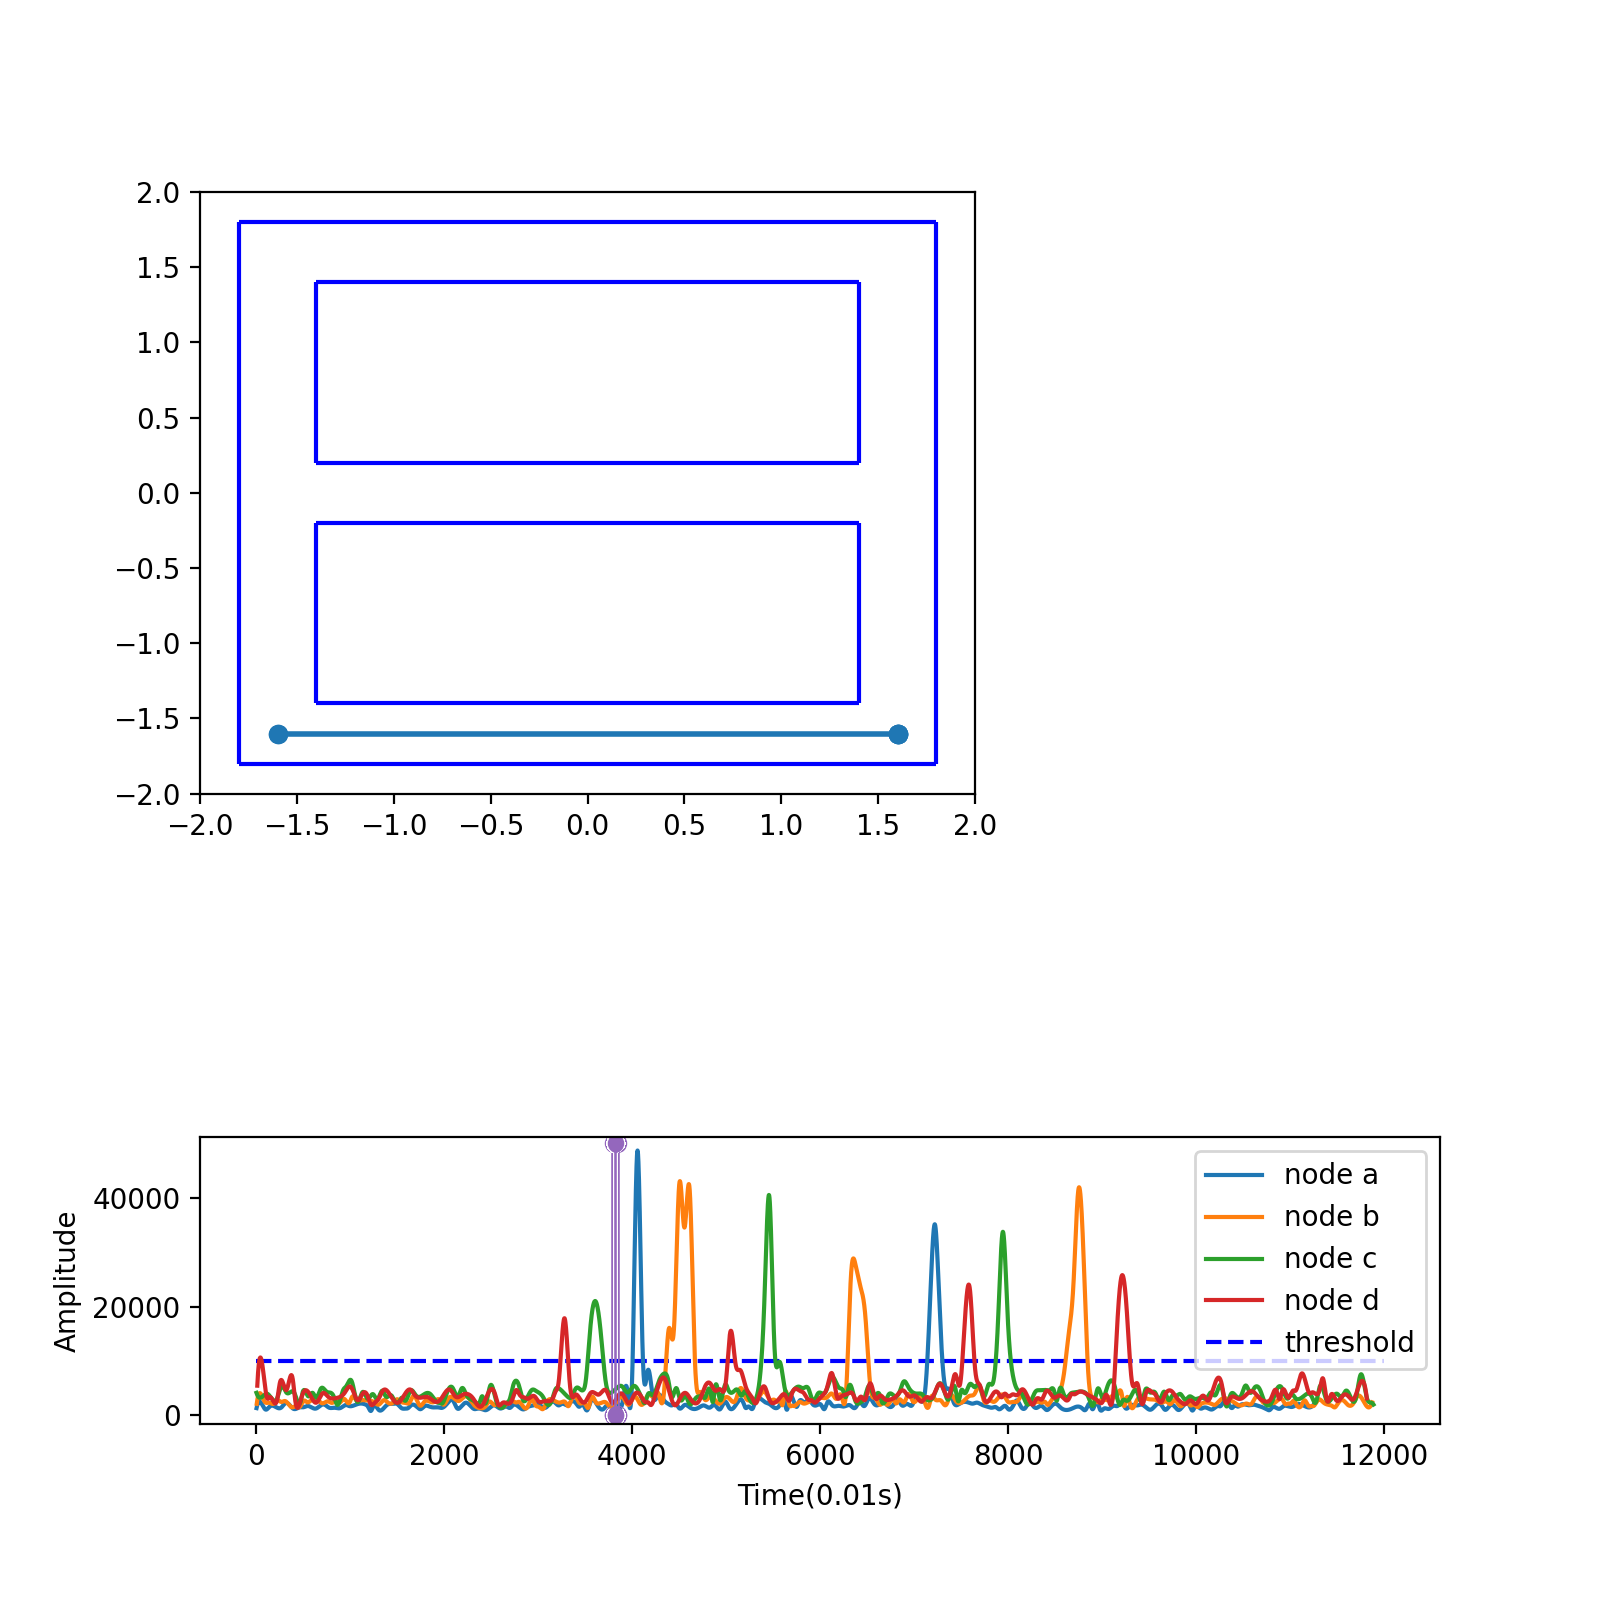

In [52]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as animation
 
def animate1(i):
    xx=np.array([0,-1.6,1.6,-1.6,1.6])
    yy=np.array([0,1.6,1.6,-1.6,-1.6])
    tt=traj[0:i]
    aim_index = np.where(tt==0)
    tt=np.delete(tt,aim_index)
    tt=tt[::-1]
    if len(tt)==0:
        tt = np.zeros(3)
    if len(tt)==1:
        tt = np.insert(tt,0,[tt[0],tt[0]])
    if len(tt)==2:
        tt = np.insert(tt,0,[tt[0]])
        
    thisx = [xx[int(tt[0])], xx[int(tt[0])],xx[int(tt[1])],xx[int(tt[1])],xx[int(tt[1])], xx[int(tt[2])],xx[int(tt[2])]]
    thisy = [yy[int(tt[0])], (yy[int(tt[0])]+yy[int(tt[1])])/2,(yy[int(tt[0])]+yy[int(tt[1])])/2,yy[int(tt[1])],(yy[int(tt[2])]+yy[int(tt[1])])/2,(yy[int(tt[2])]+yy[int(tt[1])])/2,yy[int(tt[2])]]
    #thisx = [xx[int(tt[0])], xx[int(tt[1])], xx[int(tt[2])]]
    #thisy = [yy[int(tt[0])], yy[int(tt[1])], yy[int(tt[2])]]
    
    
    #thisx = [xx[1], xx[2], xx[3]]
    #thisy = [yy[1], yy[2], yy[3]]

    line1.set_data(thisx, thisy)
    #time_text.set_text(time_template % (i*dt))
    return line1

def animate2(i):
    thisx = [x1[i], x1[i], x2[i]]
    thisy = [y1[i], y1[i], y2[i]]

    line2.set_data(thisx, thisy)
    #time_text.set_text(time_template % (i*dt))
    return line2


%matplotlib notebook
# %matplotlib inline
 
#x = np.linspace(0, 2*np.pi, 100)
#y = np.sin(x)
 
#fig = plt.figure(tight_layout=True)
#plt.plot(x,y)
#plt.grid(ls="--")
#plt.show()

grid = plt.GridSpec(4, 3, wspace=0.5, hspace=0.1)

x1 = np.linspace(0, 12000, 12001)
y1 = np.zeros(12001)

x2 = np.linspace(0, 12000, 12001)
y2 = np.zeros(12001)+50000

fig = plt.figure(figsize=(8, 8))
ax1 = fig.add_subplot(grid[0:2,0:2],autoscale_on=True, xlim=(-2, 2), ylim=(-2, 2))



#ax1.ylabel('Amplitude')
#ax1.xlabel('Time(0.01s)')
#ax1.plot(nodeae69,label='node a')
#ax1.plot(node8582,label='node b')
#ax1.plot(node4e82,label='node c')
#ax1.plot(node4868,label='node d')
#ax1.hlines(10000, 0, 12000, 'b', '--', label='threshold')
#ax1.legend()

plt.hlines(1.8, -1.8, 1.8, 'b')
plt.hlines(-1.8, -1.8, 1.8, 'b')
plt.vlines(1.8, -1.8, 1.8, 'b')
plt.vlines(-1.8, -1.8, 1.8, 'b')

plt.hlines(1.4, -1.4, 1.4, 'b')
plt.hlines(-1.4, -1.4, 1.4, 'b')
plt.hlines(0.2, -1.4, 1.4, 'b')
plt.hlines(-0.2, -1.4, 1.4, 'b')

plt.vlines(1.4, -0.2, -1.4, 'b')
plt.vlines(-1.4, -0.2, -1.4, 'b')
plt.vlines(1.4, 0.2, 1.4, 'b')
plt.vlines(-1.4, 0.2, 1.4, 'b')

#plt.plot(np.zeros_like(x), "--", color="gray")
line1, = plt.plot([], [], 'o-', lw=2)
ani1 = animation.FuncAnimation(fig, animate1, range(3000,len(y1),5),
                              interval=0.01*1000, blit=True)

ax2 = fig.add_subplot(grid[3,0:3])

plt.ylabel('Amplitude')
plt.xlabel('Time(0.01s)')
#plt.title("Automatic segmentation with mathematical morphology")
#plt.plot(x2)
plt.plot(nodeae69,label='node a')
plt.plot(node8582,label='node b')
plt.plot(node4e82,label='node c')
plt.plot(node4868,label='node d')
plt.hlines(10000, 0, 12000, 'b', '--', label='threshold')
plt.legend()

line2, = plt.plot([], [], 'o-', lw=2)


ani2 = animation.FuncAnimation(fig, animate2, range(3000,len(y1),5),
                              interval=0.01*1000, blit=True)

plt.show()






In [21]:
x1 = np.linspace(0, 12000, 12001)
y1 = np.zeros(12001)
print(x1)
print(y1)


[0.0000e+00 1.0000e+00 2.0000e+00 ... 1.1998e+04 1.1999e+04 1.2000e+04]
[0. 0. 0. ... 0. 0. 0.]


<IPython.core.display.Javascript object>


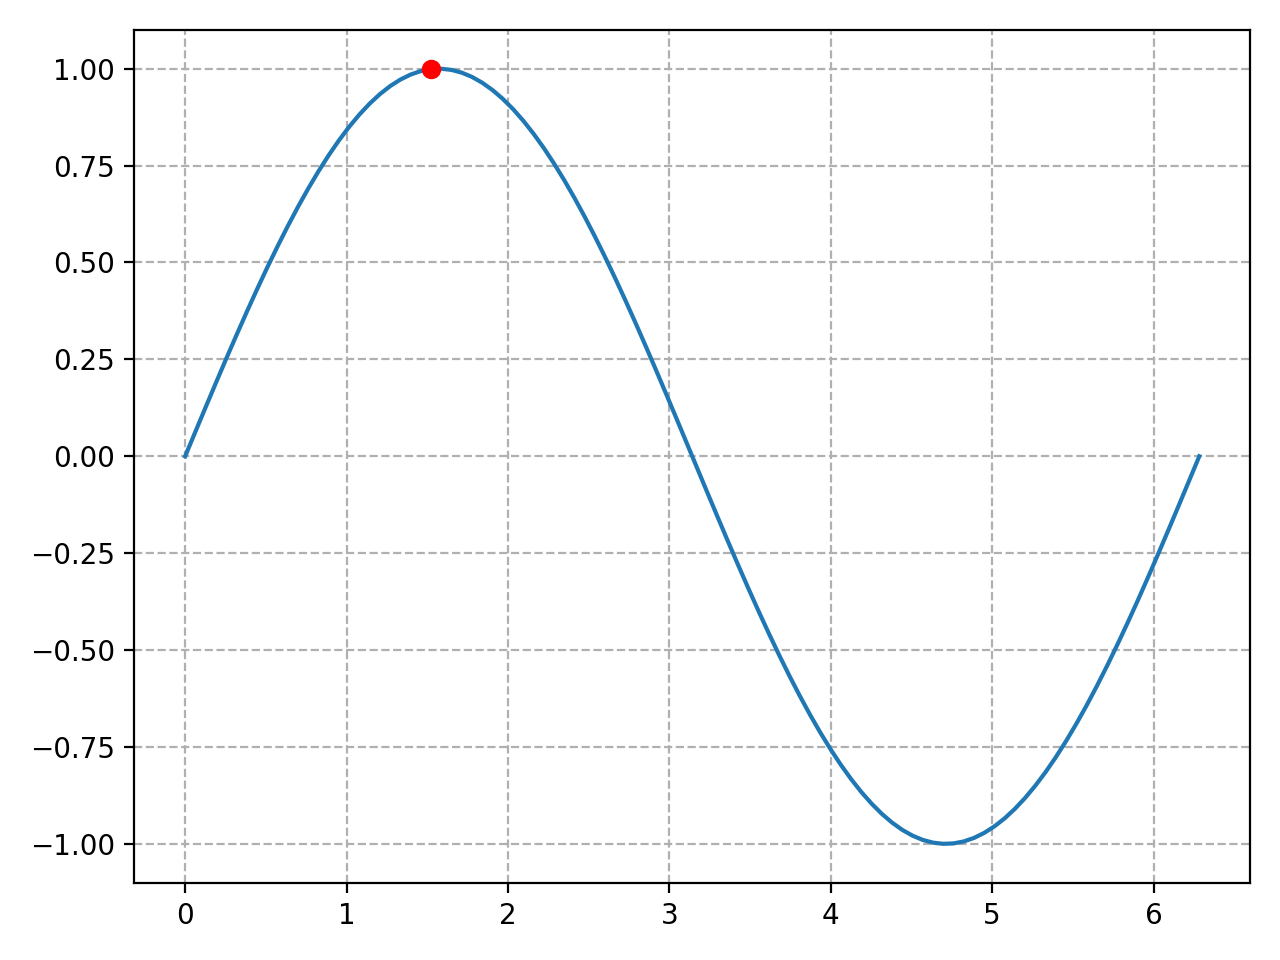

In [2]:
def update_points(num):
    '''
    更新数据点
    '''
    point_ani.set_data(x[num], y[num])
    return point_ani,
 
x = np.linspace(0, 2*np.pi, 100)
y = np.sin(x)
 
fig = plt.figure(tight_layout=True)
plt.plot(x,y)
point_ani, = plt.plot(x[0], y[0], "ro")
plt.grid(ls="--")
# 开始制作动画
ani = animation.FuncAnimation(fig, update_points, np.arange(0, 100), interval=100, blit=True)
 
# ani.save('sin_test2.gif', writer='imagemagick', fps=10)
plt.show()
